In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-03-06 17:21:45.695135: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# read chromosomes
initial_acc = 0.9728091090096544

In [4]:
# mutated chromosomes
chromosomes = None
with open('chromosomes/new_cromosomes_mutated.json') as f:
    chromosomes = json.load(f)

In [5]:
for key, value in chromosomes.items():
    chromosomes[key].append(chromosomes[key][0].count(0))
    chromosomes[key].append(chromosomes[key][0].count(1))
    chromosomes[key][1] = chromosomes[key][1]*100

In [6]:
# sort based on accuracy and number of 0s
chromosomes = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][2]), reverse=True)}

In [7]:
len(chromosomes['1'][0])

256

In [8]:
for key, value in chromosomes.items():
    print(key, value[1], value[2])

27 96.17969680904211 97
65 94.79003536143371 96
60 95.83520940241682 95
70 95.47678051134619 91
72 95.28959062314516 87
61 95.2985172001182 86
63 95.8463496383277 85
78 95.55055594887212 85
8 95.55930671043822 84
14 96.02266168308692 83
31 96.17231117665649 83
33 95.67937982498383 83
10 95.43194934887306 82
45 95.52985983715539 82
53 95.92014323312661 82
34 95.23871371122496 81
38 95.65255220465424 81
48 95.93110918405323 81
68 95.67847518699737 80
75 95.98177097250156 79
4 95.95681360366326 78
32 95.39218074922464 78
47 95.9119203408352 78
59 95.41337160460786 78
26 95.74302775359193 77
35 96.18854494289025 77
39 95.17951136971709 77
46 95.68332869738572 77
62 95.30913046651276 77
67 95.63997579043205 77
0 95.39459024395673 76
2 94.5591687288759 76
19 96.06583754826342 76
20 95.97020452884007 76
56 95.52461811481695 76
58 96.22479815164684 76
74 96.0592451137632 76
1 95.56515451933909 75
37 95.47227746247748 75
52 95.83589217552606 75
57 95.65399895585296 75
69 95.45085396396232 75
22

In [9]:
original_model = keras.models.load_model('models/base_model.h5')

2023-03-06 17:21:57.013837: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 17:21:57.174628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14786 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:8a:00.0, compute capability: 7.0


In [10]:
import fitness as fit

In [11]:
from test_train_data import x_train, y_train, x_test, y_test

In [12]:
fit.getFitness(original_model, epochs=10, verbose=1)

Epoch 1/10


2023-03-06 17:22:59.409093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-03-06 17:22:59.635049: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fa2d0a88340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-06 17:22:59.635102: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-03-06 17:22:59.642475: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-06 17:22:59.789274: I tensorflow/compiler/jit/xla_compilation_cache.cc:480] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


324/324 [==============================] - 6s 11ms/step - loss: 0.0571 - accuracy: 0.9803 - val_loss: 0.0637 - val_accuracy: 0.9745
Epoch 2/10
324/324 [==============================] - 3s 9ms/step - loss: 0.0336 - accuracy: 0.9862 - val_loss: 0.0495 - val_accuracy: 0.9855
Epoch 3/10
324/324 [==============================] - 3s 9ms/step - loss: 0.0275 - accuracy: 0.9902 - val_loss: 0.0512 - val_accuracy: 0.9806
Epoch 4/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0311 - accuracy: 0.9885 - val_loss: 0.0515 - val_accuracy: 0.9826
Epoch 5/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0220 - accuracy: 0.9921 - val_loss: 0.0642 - val_accuracy: 0.9765
Epoch 6/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0600 - val_accuracy: 0.9817
Epoch 7/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0227 - accuracy: 0.9915 - val_loss: 0.1021 - val_accuracy: 0.9748
Epoch 8/10
324/3

0.9733082103799772

In [13]:

# evaluate
test_loss, test_acc = original_model.evaluate(x_test, y_test, verbose=2)
train_loss, train_acc = original_model.evaluate(x_train, y_train, verbose=2)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

108/108 - 0s - loss: 0.0686 - accuracy: 0.9806 - 423ms/epoch - 4ms/step
324/324 - 1s - loss: 0.0037 - accuracy: 0.9989 - 1s/epoch - 4ms/step
Test accuracy: 0.9805909395217896
Train accuracy: 0.9989377856254578


In [23]:
# precision, recall, f1-score

# precision
from sklearn.metrics import precision_score
y_pred = original_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
# y_test = np.argmax(y_test, axis=1)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)

# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)

# f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

# jaccard score
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, y_pred, average='macro')
print('Jaccard score: %f' % jaccard)

# cohens kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)





108/108 [==============================] - 0s 3ms/step
Precision: 0.372538
Recall: 0.500000
F1 score: 0.426959
Jaccard score: 0.372538
Cohens kappa: 0.000000
[[2572    0]
 [ 880    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
num_params = original_model.count_params()
num_flops = original_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 21222.44724


In [11]:
import generate_sub_model as gsm

In [15]:
print(chromosomes['27'][1:])

[96.17969680904211, 97, 159]


In [16]:
new_model = gsm.genSubModel(chromosomes['27'][0], original_model)

In [14]:
import fitness as fit

In [18]:
from test_train_data import x_train, y_train, x_test, y_test

In [ ]:
fit.getFitness(new_model, epochs=10, verbose=1)


In [19]:

# evaluate
test_loss, test_acc = new_model.evaluate(x_test, y_test, verbose=2)
train_loss, train_acc = new_model.evaluate(x_train, y_train, verbose=2)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

108/108 - 0s - loss: 0.1011 - accuracy: 0.9678 - 398ms/epoch - 4ms/step
324/324 - 1s - loss: 0.0173 - accuracy: 0.9940 - 1s/epoch - 4ms/step
Test accuracy: 0.9678447246551514
Train accuracy: 0.9940131306648254


In [50]:
num_params = new_model.count_params()
num_flops = new_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 8978.54844


In [22]:
# save model
new_model.save('models/new_model.h5')

In [36]:
new_model = gsm.genSubModel(chromosomes['18'][0], original_model)

In [15]:
from test_train_data import x_train, y_train, x_test, y_test

In [39]:
new_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

new_model.fit(x_train, y_train, epochs=30, verbose=1,validation_data=(x_test, y_test))

Epoch 1/30
324/324 [==============================] - 6s 11ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.1881 - val_accuracy: 0.9699
Epoch 2/30
324/324 [==============================] - 2s 8ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.1736 - val_accuracy: 0.9716
Epoch 3/30
324/324 [==============================] - 2s 8ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.1654 - val_accuracy: 0.9670
Epoch 4/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0091 - accuracy: 0.9963 - val_loss: 0.2300 - val_accuracy: 0.9638
Epoch 5/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0151 - accuracy: 0.9939 - val_loss: 0.1676 - val_accuracy: 0.9690
Epoch 6/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1527 - val_accuracy: 0.9716
Epoch 7/30
324/324 [==============================] - 3s 8ms/step - loss: 2.7123e-04 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.9739
E

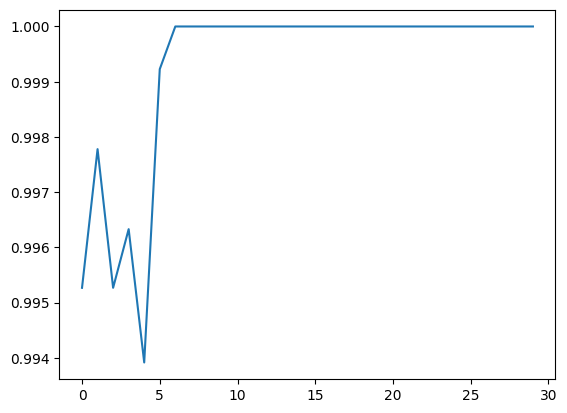

In [40]:
# draw graph of accuracy in each epoch
plt.plot(new_model.history.history['accuracy'])

In [23]:
import copy

In [24]:
for key, value in chromosomes.items():
    to_remove = {}
    to_remove_as_list = copy.deepcopy(value[0])
    for i, layer in enumerate(new_model.layers):
        if(i != 0 and i != len(new_model.layers) - 1):
            if(isinstance(layer, keras.layers.Conv2D)):
                ls = to_remove_as_list[:int(layer.filters)]
                to_remove_as_list = to_remove_as_list[int(layer.filters):]
                zero_idx = ls.count(0)
                to_remove[i] = zero_idx
            elif (isinstance(layer, keras.layers.Dense)):
                ls = to_remove_as_list[:int(layer.units)]
                to_remove_as_list = to_remove_as_list[int(layer.units):]
                zero_idx =  ls.count(0)
                to_remove[i] = zero_idx
    value.append(to_remove)

In [25]:
print(chromosomes['18'][1:])

[95.72981287195354, 70, 186, {2: 4, 4: 10, 6: 6, 9: 23}]


In [26]:
# sort chromosomes based on number of 0s and accuracy
chromosomes = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][3], item[1][2]), reverse=True)}

In [27]:
# get first 10 chromosomes sorted by accuracy
chromosomes_10 = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][1]), reverse=True)[:15]}

In [28]:
for key, value in chromosomes_10.items():
    print(value[1])

96.55652394525988
96.48113281981227
96.30882248660538
96.25736899247168
96.22479815164684
96.18854494289025
96.17969680904211
96.17231117665649
96.11960897180477
96.0801736823566
96.06583754826342
96.06135204547142
96.0592451137632
96.03963175865192
96.02266168308692


In [29]:
n = 15
x = np.arange(n)

In [30]:
accuracy = []
zeroes_l1 = []
zeroes_l2 = []
zeroes_l3 = []
zeroes_l4 = []
for key, value in chromosomes_10.items():
    accuracy.append(value[1])
    zeroes_l1.append(value[4][2])
    zeroes_l2.append(value[4][4])
    zeroes_l3.append(value[4][6])
    zeroes_l4.append(value[4][9])

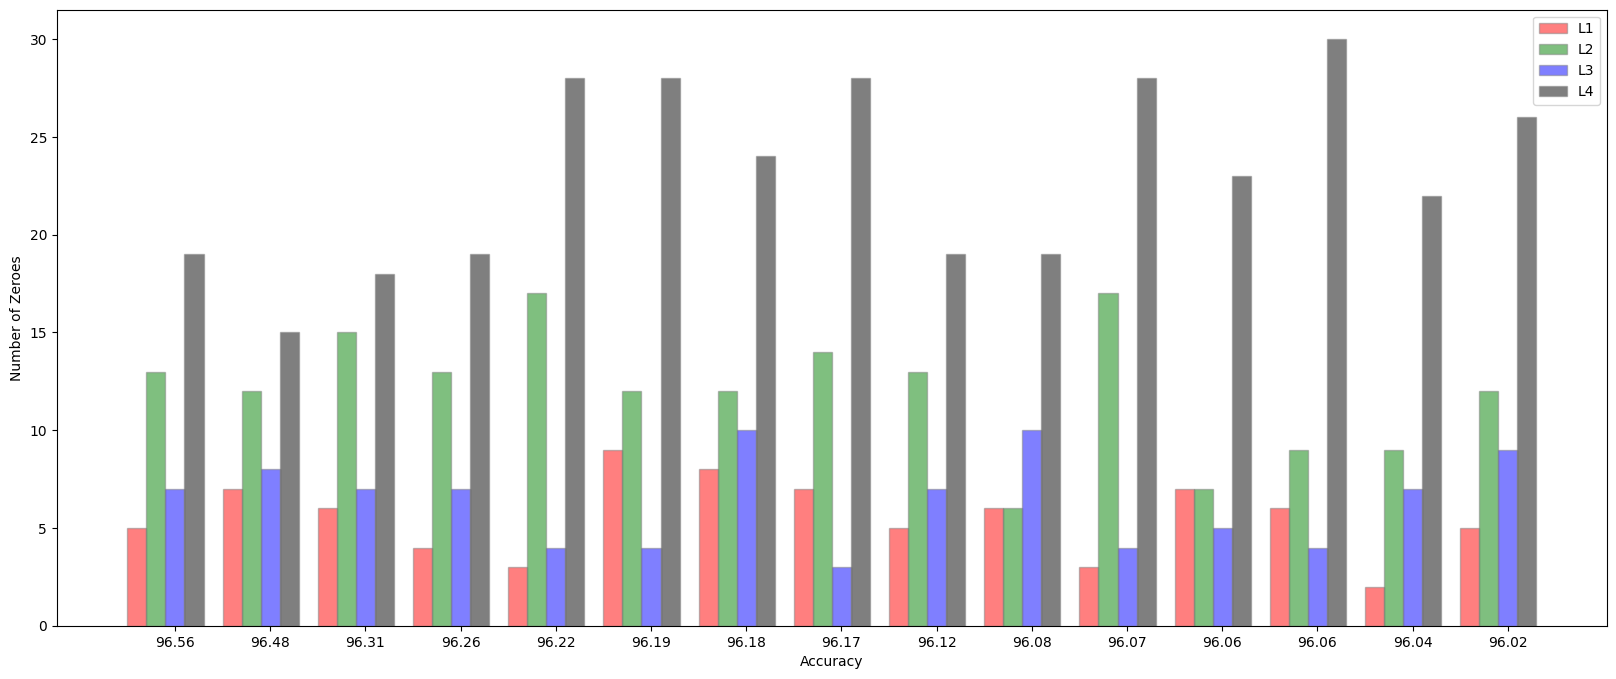

In [31]:
fig = plt.subplots(1,1,figsize =(20, 8))

plt.bar(x, zeroes_l1 , color ='r', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L1')

plt.bar(x + 0.2, zeroes_l2 , color ='g', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L2')

plt.bar(x+0.4, zeroes_l3 , color ='b', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L3')

plt.bar(x+0.6, zeroes_l4 , color ='black', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L4')

plt.xlabel("Accuracy")
plt.ylabel("Number of Zeroes")

plt.xticks(x + 0.4, [str(round(float(i),2)) for i in accuracy])

plt.legend()
plt.show()


In [32]:
models = [
    'originaLNN',
    'CompressedNN',
    'alexnet',
    'KNN',
    'LogisticRegression',
    'RandomForest',
    'resnet',
    'SVM',
]

accuracy = [
    97.39281535148621,
    96.78447246551514,
    74.9,
    88.03592120509849,
    84.50173812282734,
    91.33835457705678,
    83.4,
    90.58516801853997
]

In [44]:
import seaborn as sns

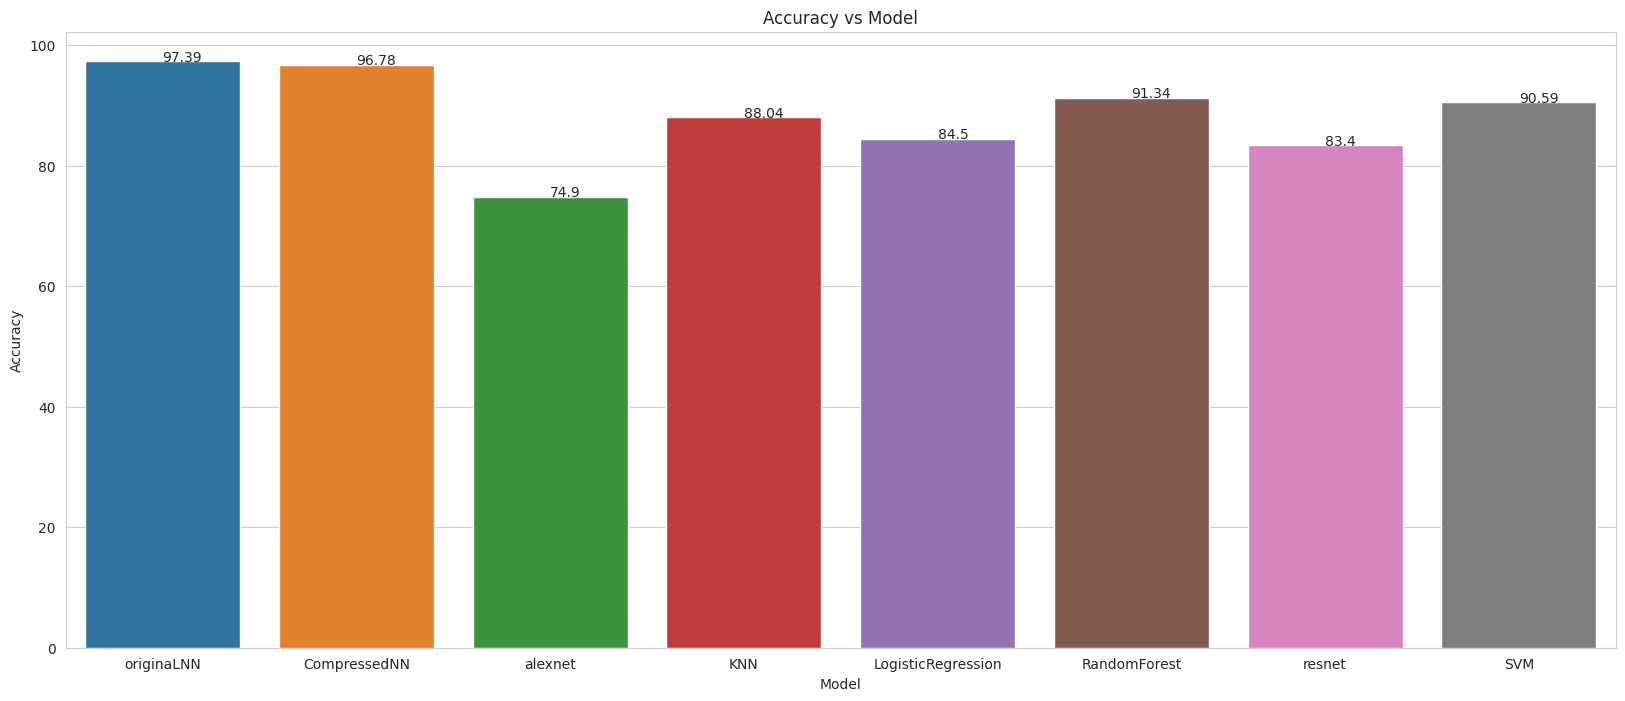

In [46]:
# draw graph of accuracy vs model with labels and title
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.title("Accuracy vs Model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
sns.barplot(x=models, y=accuracy)

# bar labels
for index, value in enumerate(accuracy):
    plt.text(index, value, str(round(value, 2)))

plt.show()


# MFLOPS


In [51]:
num_params = original_model.count_params()
num_flops = original_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 21222.44724


In [52]:
num_params = new_model.count_params()
num_flops = new_model.count_params() * x_train.shape[0] * 10
num_mflops = num_flops / 1e6
print('Number of MFLOPS:', num_mflops)

Number of MFLOPS: 8978.54844


In [54]:
import os

In [56]:
# size of original model
print('Original model size:', os.path.getsize('models/base_model.h5'))


Original model size: 2518152


In [57]:
print('Original model size:', os.path.getsize('models/new_model.h5'))


Original model size: 1098632


In [58]:
# find amount of compression
print('Compression:', 1 - (os.path.getsize('models/new_model.h5') / os.path.getsize('models/base_model.h5')))

Compression: 0.5637149782856634


In [ ]:
# find accuracy, precision, recall, f1 score, jaccard index, kappa score, confusion matrix, ROC curve, AUC score, etc.

# precision
from sklearn.metrics import precision_score
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)

# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

# jaccard index
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, y_pred, average='macro')
print('Jaccard score: %f' % jaccard)

# kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)

# AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC=%.3f' % (auc))


: 

In [3]:
x_test

NameError: name 'x_test' is not defined